## 1) What is Boosting in Machine Learning? Explain how it improves weak learners.

**Boosting** is a machine learning ensemble technique that combines multiple **weak learners** to create a **strong learner**. The core idea is to train models sequentially, each one trying to correct the errors of its predecessor.

---

### 🔍 What is a Weak Learner?

A **weak learner** is a model that performs slightly better than random guessing. For example, in binary classification, a weak learner might have an accuracy just over 50%.

The most common weak learners used in boosting are **decision stumps**, which are decision trees with only one split.

---

### 💡 How Boosting Works (Step-by-Step):

1. **Initialize Weights**:

   * Assign equal weights to all training examples.

2. **Train First Weak Learner**:

   * A model is trained on the data with the current weights.

3. **Evaluate Errors**:

   * Misclassified points get higher weights, while correctly classified points get lower weights.

4. **Train Next Weak Learner**:

   * The next model focuses more on the hard-to-classify examples (those with higher weights).

5. **Repeat**:

   * This process continues for a fixed number of iterations or until the model achieves good performance.

6. **Combine Learners**:

   * Final prediction is made by combining all weak learners using a weighted vote or sum.

---

### 🧠 Why Does It Work?

Boosting improves performance by:

* Focusing sequentially on the mistakes made by previous learners.
* Reducing **bias** and **variance**.
* Converting weak learners into a strong ensemble that generalizes well.

---

### 📦 Popular Boosting Algorithms

* **AdaBoost (Adaptive Boosting)** – Changes weights of instances.
* **Gradient Boosting** – Optimizes loss function using gradient descent.
* **XGBoost**, **LightGBM**, **CatBoost** – Efficient implementations for large-scale applications.

---

### ✅ Example Use Case

Suppose we want to detect spam emails. A single weak learner might just look at the presence of the word "free". Not enough to classify well.

With boosting:

* First learner classifies based on "free".
* Second learner focuses on misclassified emails, maybe learns to look for "urgent".
* Third learner adds "win now", and so on.
* The ensemble of all these simple models can accurately detect spam.

---

### Summary:

* **Boosting** is about combining many weak learners to create a strong learner.
* It does this by training models sequentially and focusing on errors.
* It's powerful and widely used for structured/tabular data tasks.

Let me know if you'd like a visual explanation or code example.


## 2) What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

The main difference between **AdaBoost** and **Gradient Boosting** lies in **how** they train models and update them during the boosting process.

Here’s a clear comparison:

---

### 🔁 **1. Training Approach**

| Feature              | **AdaBoost**                                                   | **Gradient Boosting**                                                              |
| -------------------- | -------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Focus**            | Adjusts **weights of data points**                             | Optimizes a **loss function** using gradients                                      |
| **Error Handling**   | Increases weights of **misclassified samples**                 | Fits the next model to the **residual errors** (negative gradient)                 |
| **Learner Training** | Each learner focuses more on previously **misclassified data** | Each learner **corrects the residuals** (difference between prediction and actual) |
| **Update Mechanism** | Instance weights updated after each learner                    | Residuals calculated and new learner trained on them                               |

---

### ⚙️ **2. Model Output Combination**

| Aspect          | AdaBoost                                                             | Gradient Boosting                                                |
| --------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------- |
| **Combination** | Weighted majority vote (classification) or weighted sum (regression) | Sum of all models’ outputs (usually added to current prediction) |
| **Weighting**   | Each model’s vote depends on its accuracy                            | Each model is scaled by a **learning rate**                      |

---

### 📘 Example:

* **AdaBoost**:

  * Starts with equal weights.
  * Misclassified points get higher weights.
  * Next learner pays more attention to those.
  * Final result = weighted vote of all learners.

* **Gradient Boosting**:

  * Starts with an initial prediction (e.g., mean).
  * Calculates residuals (errors).
  * Trains next model to predict these residuals.
  * Updates the overall prediction.
  * Final result = sum of all learners' contributions.

---

### 🚀 Summary:

| Feature                 | **AdaBoost**                 | **Gradient Boosting**                  |
| ----------------------- | ---------------------------- | -------------------------------------- |
| **Weighting mechanism** | Adjusts data point weights   | Fits model to gradients (residuals)    |
| **Loss optimization**   | Not explicit                 | Directly minimizes a loss function     |
| **Interpretation**      | Focus on hard examples       | Focus on reducing loss                 |
| **Flexibility**         | Primarily for classification | Used for classification and regression |


## 3) How does regularization help in XGBoost?

In **XGBoost** (Extreme Gradient Boosting), **regularization** plays a crucial role in improving model performance and preventing overfitting. It helps to control the complexity of the model by penalizing overly complex trees, which could otherwise result in poor generalization to new data.

### **Key Regularization Techniques in XGBoost**

1. **L1 Regularization (Lasso)**:

   * L1 regularization penalizes the **absolute values** of the weights (coefficients) of the model.
   * It helps in **feature selection** by encouraging sparsity, meaning that some feature weights are reduced to zero, effectively removing those features from the model.
   * This is controlled by the parameter `alpha` in XGBoost.

2. **L2 Regularization (Ridge)**:

   * L2 regularization penalizes the **squared values** of the weights, thus keeping them smaller and more evenly distributed.
   * It helps in avoiding large weights and reducing model complexity.
   * In XGBoost, this is controlled by the `lambda` parameter.

3. **Tree Complexity Control**:
   XGBoost also controls the complexity of the individual trees, which is another form of regularization:

   * **Max Depth (`max_depth`)**: Controls the depth of each tree. Limiting the depth prevents the tree from growing too large and capturing noise in the data.
   * **Minimum Child Weight (`min_child_weight`)**: Specifies the minimum sum of instance weights (or number of samples) required in a child node. This helps control the tree’s growth.
   * **Subsampling**: XGBoost can randomly sample a fraction of the training data (`subsample`) to build each tree, which prevents overfitting by ensuring trees don't overfit to specific patterns in the training set.

---

### **How Regularization Helps in XGBoost**:

1. **Prevents Overfitting**: Regularization penalizes overly complex models, preventing them from fitting noise in the data.
2. **Improves Generalization**: By controlling the complexity of individual trees and shrinking feature weights, regularization helps the model generalize better to unseen data.
3. **Feature Selection**: L1 regularization encourages sparse solutions, effectively removing irrelevant or redundant features, which improves model interpretability and efficiency.
4. **Balances Bias-Variance Tradeoff**: The regularization terms help balance the tradeoff between bias (underfitting) and variance (overfitting), allowing the model to achieve a sweet spot for prediction accuracy.

---

### **XGBoost Regularization Formula**:

The objective function in XGBoost, which is minimized during training, consists of two parts:

1. **Loss Function** (typically Mean Squared Error or Log-Loss for regression and classification)
2. **Regularization Term** (penalizes model complexity)

So, the overall objective function can be expressed as:

$$
\text{Objective} = \text{Loss Function} + \text{Regularization Term}
$$

The regularization term in XGBoost is given by:

$$
\text{Regularization} = \sum_{k} \left[ \lambda \cdot \text{Leaf Weight}^2 + \alpha \cdot |\text{Leaf Weight}| + \gamma \cdot \text{Tree Complexity} \right]
$$

Where:

* $\lambda$ (L2 regularization) controls the weight size.
* $\alpha$ (L1 regularization) controls sparsity.
* $\gamma$ controls the minimum number of samples required to form a new tree.

---

### **How to Tune Regularization Parameters in XGBoost**:

* **`lambda` (L2)**: Set to a small value (e.g., 0, 1) if you want to prevent overly large weights in trees.
* **`alpha` (L1)**: Set to a value greater than 0 to encourage sparsity. A larger alpha value means more aggressive feature selection.
* **`max_depth`**: Controls how deep the trees grow. A smaller value may help reduce overfitting.
* **`min_child_weight`**: This is often tuned to control how many samples a leaf node should contain before splitting. Larger values prevent overfitting.
* **`subsample` and `colsample_bytree`**: Randomly sample a subset of data and features to prevent trees from overfitting on the full dataset.

---

### **Example of XGBoost Regularization in Code**:

```python
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load dataset
data = load_boston()
X = data.data
y = data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up XGBoost parameters with regularization
params = {
    'objective': 'reg:squarederror',  # Regression problem
    'booster': 'gbtree',  # Tree-based model
    'eta': 0.1,  # Learning rate
    'max_depth': 4,  # Depth of each tree
    'lambda': 1,  # L2 regularization
    'alpha': 0.1,  # L1 regularization
    'min_child_weight': 1,  # Minimum sum of instance weight
    'subsample': 0.8,  # Subsample ratio of the training data
    'colsample_bytree': 0.8,  # Subsample ratio of features for each tree
    'n_estimators': 100  # Number of boosting rounds
}

# Train XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Evaluate model
score = model.score(X_test, y_test)
print(f"R^2 score: {score:.4f}")
```

---

### **Conclusion**:

Regularization in **XGBoost** helps in:

* Reducing **overfitting** by controlling model complexity.
* Encouraging **sparsity** and **feature selection** via L1 regularization.
* Balancing bias and variance to create a model that generalizes well on unseen data.

By fine-tuning regularization parameters, you can create a more robust and interpretable model.

## 4) Why is CatBoost considered efficient for handling categorical data?

**CatBoost** is highly regarded for its ability to efficiently handle **categorical data** without requiring extensive preprocessing like one-hot encoding. The key to its efficiency lies in how it **encodes categorical features**, **builds decision trees**, and applies **gradient boosting**. Here’s why CatBoost stands out:

### 1. **Categorical Feature Handling with Ordered Target Statistics**

* **CatBoost** uses a novel method called **ordered target statistics** (also known as **ordered boosting**) to handle categorical features.
* Traditional gradient boosting models (like XGBoost or LightGBM) typically convert categorical features into numerical representations using **one-hot encoding** or **integer encoding**. However, these methods don’t always capture the relationships or distributions of categories effectively, especially when dealing with high-cardinality features (features with many unique categories).
* Instead of relying on these basic encoding methods, CatBoost performs **target-based encoding** for categorical features, where the model calculates the **mean target value** for each category based on previous data points in the training process.

  * This is done **sequentially** to avoid **data leakage** (using future information to predict the current sample).
  * CatBoost maintains a **prior** for each category and updates it based on observed patterns, which leads to better handling of unseen categories during training.

### 2. **Ordered Target Statistics to Prevent Overfitting**

* **Ordered boosting** ensures that the target statistics are computed in a way that prevents the model from leaking information about the target variable.
* For each category, the model computes the mean of the target variable but **excludes** the current sample (i.e., uses only previous data). This process ensures that the computed statistics are not influenced by the current row, mitigating overfitting risks.

### 3. **Efficient Handling of High Cardinality Categorical Features**

* Categorical features with many possible values (high cardinality) are particularly challenging in other algorithms because they can result in a large number of dummy variables when one-hot encoding is used. This increases the dimensionality of the dataset and often leads to inefficiency.
* **CatBoost** handles high-cardinality categorical features more efficiently by calculating a single numeric representation per category rather than creating a large number of binary columns.

### 4. **No Need for Preprocessing (e.g., One-Hot Encoding)**

* One of the primary advantages of **CatBoost** over other gradient boosting models is that it **does not require one-hot encoding** or other forms of explicit preprocessing for categorical features.
* The model itself automatically handles categorical data internally, which greatly simplifies the data preparation process and saves both memory and computation time.

### 5. **Efficient Memory Usage**

* CatBoost handles categorical features without creating large, sparse matrices like one-hot encoding would. This helps keep the memory footprint small, especially when dealing with a large number of categorical variables or high-cardinality features.
* Instead of creating many dummy variables, CatBoost just uses a compact numeric representation (based on target statistics) that is more memory-efficient.

### 6. **Handling of Missing Values**

* **CatBoost** is capable of efficiently handling missing values in both numerical and categorical features.
* It uses **special algorithms** that help the model deal with missing data in categorical variables during training and prediction, preventing the need for complicated imputation techniques.

### 7. **Fast Training Speed**

* Thanks to its efficient handling of categorical features, CatBoost can train models faster compared to other gradient boosting algorithms that require extra processing steps for categorical data.
* It also includes **multi-threading** and **GPU support**, which further enhance the speed of training, especially with large datasets.

### 8. **Robust to Overfitting**

* CatBoost includes techniques like **Random Permutation (shuffling)** and **Early Stopping** that further help in preventing overfitting.
* It uses **gradient-based optimization** alongside robust regularization methods, making it resilient to noisy or small datasets.

---

### **Example of CatBoost Handling Categorical Data:**

```python
from catboost import CatBoostClassifier
import pandas as pd

# Example dataset with categorical data
data = {
    'color': ['red', 'blue', 'green', 'red', 'blue'],
    'size': ['small', 'large', 'small', 'large', 'small'],
    'target': [1, 0, 1, 0, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical columns into appropriate format for CatBoost
cat_features = ['color', 'size']

# Split the dataset into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Train a CatBoost model
model = CatBoostClassifier(cat_features=cat_features, iterations=100, learning_rate=0.1)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print(predictions)
```

In this example:

* **`cat_features`** parameter is used to specify the categorical columns. CatBoost internally handles their encoding without needing to apply one-hot encoding.
* The model is fit directly with categorical features in their original form, simplifying the workflow.

---

### **Summary of CatBoost's Efficiency in Handling Categorical Data**:

1. **Ordered Target Statistics**: CatBoost calculates the target mean for each category based on past observations to avoid data leakage.
2. **No Need for Manual Encoding**: It automatically handles categorical features, reducing preprocessing steps.
3. **Efficient Memory Usage**: By using target-based encoding instead of one-hot encoding, it reduces dimensionality and memory overhead.
4. **Handling High Cardinality**: CatBoost can efficiently manage categorical features with many unique values without creating sparse matrices.
5. **Fast and Robust**: The model uses various optimizations to ensure fast training while avoiding overfitting.

Overall, **CatBoost** is considered efficient for handling categorical data because of its built-in, well-optimized techniques that directly integrate categorical features into the model-building process without complex preprocessing.

## 5) What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting techniques are preferred over bagging methods in several real-world applications due to their ability to improve the predictive performance of weak models and their tendency to work well with **imbalanced data**, **complex patterns**, and **high variance**. Here are some examples of when boosting techniques, such as **AdaBoost**, **Gradient Boosting**, **XGBoost**, and **CatBoost**, are preferred over bagging methods like **Random Forest**:

### 1. **Imbalanced Classification Problems**

* **Scenario**: In applications where one class is significantly more frequent than another (e.g., fraud detection, rare event prediction), boosting is often preferred.
* **Why Boosting Works Better**: Boosting methods like **XGBoost** and **AdaBoost** focus on misclassified examples, which is particularly useful when dealing with rare events or underrepresented classes. By assigning higher weights to misclassified instances, boosting helps the model focus on the minority class, thus improving overall performance on imbalanced datasets.
* **Example**: **Credit card fraud detection** – where fraudulent transactions are rare but critical to identify.

### 2. **Predicting Complex, Non-linear Patterns**

* **Scenario**: Boosting techniques are ideal for applications where the relationship between the features and the target variable is **non-linear** or highly complex, such as in **image classification**, **natural language processing (NLP)**, or **bioinformatics**.
* **Why Boosting Works Better**: Boosting iteratively refines its predictions by focusing on errors from previous models. This ability to capture and adjust to complex patterns, especially with gradient boosting methods, gives it an edge over bagging methods, which work by averaging predictions of multiple independent models.
* **Example**: **Image recognition and classification** – Boosting methods like **Gradient Boosting** or **XGBoost** can learn complex image features, providing better results than bagging methods that rely on random subsets of data.

### 3. **High-Variance Data**

* **Scenario**: In cases where the model needs to be able to handle high variance in the data (i.e., data that is highly noisy or has many outliers), boosting is often preferred.
* **Why Boosting Works Better**: Boosting **reduces variance** by systematically correcting errors, whereas bagging methods like Random Forest tend to focus on **averaging** many trees, which can result in higher variance when the trees are not strong enough.
* **Example**: **Customer churn prediction** – where there may be many variables interacting in non-obvious ways, boosting helps capture these interactions better.

### 4. **Small to Medium-Sized Datasets**

* **Scenario**: Boosting methods tend to work better on smaller to medium-sized datasets where the learning process can afford to focus on **refining mistakes** iteratively.
* **Why Boosting Works Better**: Boosting methods like **XGBoost** or **LightGBM** are designed to be **more sample-efficient** compared to bagging methods like **Random Forest**, which require a large number of trees to provide stable predictions.
* **Example**: **Healthcare data analysis** – For predicting patient outcomes from relatively small datasets, boosting techniques can work better by improving model accuracy iteratively.

### 5. **Feature Importance and Interpretability**

* **Scenario**: Applications that require **interpretability** and **feature selection**, such as in **financial modeling** or **healthcare**, benefit from boosting methods, which provide better insights into feature importance.
* **Why Boosting Works Better**: Boosting, especially algorithms like **XGBoost**, outputs a feature importance score, helping practitioners understand which features contribute most to the final predictions. This is often crucial in industries where transparency is necessary.
* **Example**: **Risk assessment in insurance** – Boosting can help determine which factors (e.g., age, driving history) are most predictive of a customer’s likelihood to file a claim.

### 6. **Competition in Machine Learning (Kaggle Competitions)**

* **Scenario**: Boosting methods are commonly used to win machine learning competitions, especially those hosted on platforms like Kaggle, where the goal is to achieve the highest predictive accuracy.
* **Why Boosting Works Better**: Boosting models such as **XGBoost**, **LightGBM**, and **CatBoost** are known for their high performance and ability to **fine-tune predictions**. They can outperform other models, including bagging methods, because they iteratively correct errors and are highly customizable.
* **Example**: **Kaggle Titanic competition** – Boosting methods are often a go-to choice because they typically yield higher accuracy compared to bagging methods like Random Forest.

### 7. **Anomaly Detection**

* **Scenario**: In anomaly detection tasks where the goal is to detect rare patterns or outliers (e.g., fraud detection, network intrusion detection), boosting is often preferred.
* **Why Boosting Works Better**: Boosting is focused on difficult-to-predict or misclassified data points (the outliers or anomalies), and thus it is well-suited to tasks that involve identifying unusual or abnormal behavior in datasets.
* **Example**: **Network intrusion detection** – where anomalies (e.g., hacking attempts) are rare but critical to identify quickly.

### 8. **Regression Problems with Complex Dependencies**

* **Scenario**: For regression tasks where the target variable has a complex, non-linear relationship with the input features, boosting tends to be more effective than bagging.
* **Why Boosting Works Better**: Boosting builds the model incrementally, focusing on minimizing the residuals (errors) from previous iterations. This allows boosting methods to learn **complex dependencies** between input features and the target.
* **Example**: **Real estate price prediction** – where prices depend on a combination of factors such as location, size, amenities, etc., with complex, non-linear relationships.

### 9. **Time Series Forecasting with Trends or Seasonality**

* **Scenario**: When predicting time series data that exhibits **trends** or **seasonality** (e.g., predicting sales, stock prices), boosting methods can work better by capturing temporal patterns.
* **Why Boosting Works Better**: Boosting methods can be adapted to sequential data (by using lagged features) and focus on the errors made at each time step. This makes boosting particularly useful for time series forecasting, where the model needs to understand **patterns over time**.
* **Example**: **Stock market prediction** – Boosting models, like **XGBoost** or **CatBoost**, are often used to predict stock prices or other financial metrics because of their ability to capture temporal dependencies and trends in historical data.

---

### **Summary**: When to Prefer Boosting over Bagging

* **Imbalanced Data**: Boosting focuses on hard-to-classify instances (misclassified data), which is useful in class imbalance.
* **Complex Non-linear Relationships**: Boosting excels at capturing complex interactions in data, which bagging methods like Random Forest may miss.
* **High-Variance Data**: Boosting can help reduce variance by learning from the residuals, while bagging reduces variance by averaging predictions.
* **Small to Medium Datasets**: Boosting works well with small datasets, especially when combined with regularization techniques.
* **Feature Importance**: Boosting provides better feature importance, which is useful in interpretable modeling tasks.

In contrast, **bagging methods like Random Forest** are generally better when:

* You want a **robust** model with less focus on fine-tuning.
* The data is **very noisy**, and you need to reduce variance by averaging many independent models.
* You have **enough data** to handle the computational cost of training many trees.

Both boosting and bagging have their place, but boosting is often preferred in scenarios where **high predictive accuracy**, **complex patterns**, and **fine-grained error correction** are critical.

## Datasets:
## ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
## ● Use sklearn.datasets.fetch_california_housing() for regression tasks.

## 6) Write a Python program to:

## ● Train an AdaBoost Classifier on the Breast Cancer dataset

## ● Print the model accuracy

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_boost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"AdaBoost Classifier Accuracy: {accuracy * 100:.2f}%")

AdaBoost Classifier Accuracy: 96.49%


## 7) Write a Python program to:

## ● Train a Gradient Boosting Regressor on the California Housing dataset

##● Evaluate performance using R-squared score

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"Gradient Boosting Regressor R-squared score: {r2:.4f}")

Gradient Boosting Regressor R-squared score: 0.7756


## 8) Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for tuning the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150]
}

# Perform GridSearchCV to tune the learning rate
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score (accuracy)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the best parameters and accuracy on training data
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy * 100:.2f}%")

# Train the XGBoost model using the best parameters
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy on the test set
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 96.70%
Test Accuracy: 95.61%


## 9) Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy: 97.37%


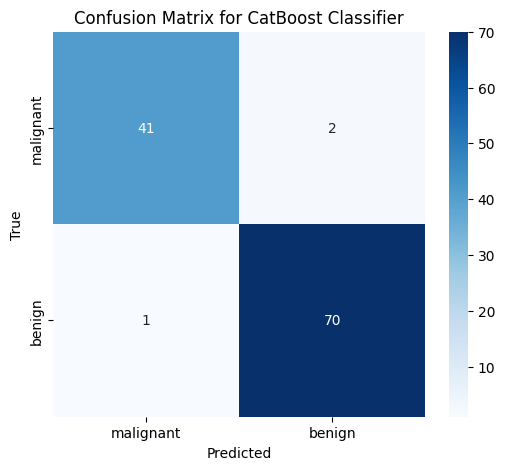

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)

# Train the CatBoost model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy * 100:.2f}%")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for CatBoost Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 10) You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

### Data Science Pipeline for Predicting Loan Default Using Boosting Techniques

When working on a loan default prediction model in a FinTech company with imbalanced data, missing values, and a mix of numeric and categorical features, it’s important to follow a well-structured data science pipeline. Below is the step-by-step approach for building the model using boosting techniques like AdaBoost, XGBoost, or CatBoost.

---

### 1. **Data Preprocessing & Handling Missing/Categorical Values**

#### a. **Load and Inspect Data:**

* **Initial Steps:** Load the dataset and inspect its structure, including dimensions, types of features, and the presence of missing values or outliers.

  ```python
  import pandas as pd
  data = pd.read_csv('loan_default_data.csv')
  data.info()
  data.describe()
  ```

#### b. **Handling Missing Values:**

* **Imputation Strategy:** If missing values are present, decide between imputing with the mean, median, or mode for numerical features and the mode for categorical features.

  * For numerical features, use **median** (less sensitive to outliers):

    ```python
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
    ```
  * For categorical features, use **mode**:

    ```python
    data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode()[0])
    ```

  If the percentage of missing values is very high in a feature, consider dropping it entirely.

  ```python
  data.dropna(axis=1, thresh=0.7*len(data), inplace=True)
  ```

#### c. **Handling Categorical Variables:**

* **Encoding Categorical Variables:** Categorical features need to be encoded. There are two approaches:

  * **One-Hot Encoding** for nominal categorical variables with fewer categories (e.g., gender).

    ```python
    data = pd.get_dummies(data, columns=['category_feature'])
    ```
  * **Label Encoding** for ordinal categorical variables or features with a large number of categories.

    ```python
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['category_feature'] = le.fit_transform(data['category_feature'])
    ```

#### d. **Feature Scaling:**

* **Standardization** is necessary for boosting algorithms when numerical features have different scales.

  ```python
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
  ```

#### e. **Addressing Imbalanced Data:**

* **Resampling:** Since the dataset is imbalanced, we need to handle this problem.

  * **Oversampling** (SMOTE or random oversampling) to balance the classes:

    ```python
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(sampling_strategy='minority')
    X_res, y_res = smote.fit_resample(X, y)
    ```
  * **Undersampling** (random undersampling) can also be an option.
  * Alternatively, **class weights** can be adjusted in the model (boosting algorithms like XGBoost and CatBoost can handle this natively).

---

### 2. **Choice Between AdaBoost, XGBoost, or CatBoost**

* **AdaBoost**:

  * **Pros**: Simple, fast, works well with small datasets.
  * **Cons**: Sensitive to noisy data, less powerful for large datasets or complex patterns compared to XGBoost and CatBoost.

* **XGBoost**:

  * **Pros**: Powerful and highly efficient for large datasets, handles missing values natively, supports regularization, and is robust to overfitting.
  * **Cons**: Can be slower compared to other boosting techniques if the model is not optimized.

* **CatBoost**:

  * **Pros**: Specifically designed to handle categorical features efficiently without needing to manually encode them, often yields great results with minimal tuning.
  * **Cons**: Can be more resource-intensive, especially for very large datasets.

### **Recommendation**: Since the dataset contains both numeric and categorical features, **CatBoost** would likely perform well without needing heavy feature engineering. If computational resources are available, I would prioritize **CatBoost** for its ease of use and handling of categorical features.

---

### 3. **Hyperparameter Tuning Strategy**

* **Cross-validation:** Perform hyperparameter tuning using **GridSearchCV** or **RandomizedSearchCV** with k-fold cross-validation (usually 5 or 10 folds). This helps ensure the model generalizes well on unseen data.

  Example with **CatBoost**:

  ```python
  from catboost import CatBoostClassifier
  from sklearn.model_selection import GridSearchCV

  param_grid = {
      'iterations': [200, 500, 1000],
      'depth': [4, 6, 8],
      'learning_rate': [0.01, 0.05, 0.1],
      'l2_leaf_reg': [1, 3, 5]
  }

  catboost_model = CatBoostClassifier(cat_features=categorical_columns)
  grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
  grid_search.fit(X_res, y_res)

  best_params = grid_search.best_params_
  print(f"Best Parameters: {best_params}")
  ```

* **Early Stopping:** Use early stopping during training to prevent overfitting. Many boosting algorithms like **XGBoost** and **CatBoost** support early stopping out of the box.

---

### 4. **Evaluation Metrics**

* **Accuracy**: While a commonly used metric, accuracy may not fully reflect the performance when the dataset is imbalanced.

* **Precision, Recall, F1-Score**: These are more meaningful metrics in an imbalanced setting.

  * **Precision**: The proportion of true positives out of all predicted positives. It’s useful to minimize false positives (e.g., incorrectly flagging a non-defaulting customer as likely to default).
  * **Recall**: The proportion of true positives out of all actual positives. It’s useful when missing a true default (false negative) is more costly than a false positive.
  * **F1-Score**: The harmonic mean of precision and recall. It balances both metrics, especially when dealing with class imbalance.

  ```python
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  ```

* **ROC-AUC Score**: Since we’re dealing with imbalanced classes, **AUC-ROC** is useful to evaluate how well the model distinguishes between the classes.

  ```python
  from sklearn.metrics import roc_auc_score
  auc = roc_auc_score(y_test, y_pred_prob)
  print(f"AUC-ROC Score: {auc}")
  ```

* **Confusion Matrix**: Use a confusion matrix to visualize the number of false positives, false negatives, true positives, and true negatives.

  ```python
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
  ```

---

### 5. **How the Business Would Benefit from the Model**

* **Risk Mitigation**: By accurately predicting loan defaults, the business can minimize losses by identifying high-risk customers in advance. The model can enable the company to implement stricter credit policies or offer risk-based pricing for loans.

* **Operational Efficiency**: Automating the loan approval process and flagging high-risk customers for further review reduces the need for manual intervention, speeding up decision-making.

* **Customer Segmentation**: The model can help segment customers into different risk categories. This allows for tailored communication and interventions (e.g., offering financial counseling or setting up payment plans for high-risk customers).

* **Regulatory Compliance**: A reliable model that predicts defaults can ensure that the company remains compliant with industry regulations regarding responsible lending practices.

* **Increased Profitability**: By reducing defaults, the company can improve its profitability while maintaining a competitive interest rate, attracting more customers without increasing financial risk.

---

### Conclusion

By following this pipeline, we can build an effective loan default prediction model that leverages the power of boosting techniques (like **CatBoost**), handles missing values and categorical features efficiently, performs hyperparameter tuning, and evaluates the model using appropriate metrics. The business can benefit significantly from better risk management, operational efficiencies, and improved profitability.